<a href="https://colab.research.google.com/github/PawanSths/Perceptron/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import statistics as stats

dataX = np.array([93.33, 86.67, 86.67, 6.67, 80, 80, 60,
                  73.33,46.67,46.67,86.67,73.33,66.67,93.33,
                  80,66.67,13.33,80,26.67,46.67])
dataY = np.array([28,25,22,25,24,26,16,21,26,17,27,23,19,
                  25,23,9,18,26,14,7])

X = 80

dataXAvg = np.mean(dataX)
dataYAvg = np.mean(dataY)

x = dataX - dataXAvg
y = dataY - dataYAvg

modeX = stats.mode(dataX)
modeY = stats.mode(dataY)

medianX = np.median(dataX)
medianY = np.median(dataY)

varianceX = np.var(dataX)
varianceY = np.var(dataY)
stdDevX = np.std(dataX)
stdDevY = np.std(dataY)

xy = x * y
xSqr = x ** 2
ySqr = y ** 2


sumxy = np.sum(xy)
sumxSqr = np.sum(xSqr)
sumySqr = np.sum(ySqr)


rCoefficient = sumxy / np.sqrt(sumxSqr * sumySqr)

b = sumxy / sumxSqr
a = dataYAvg - b * dataXAvg

Y = a + b * X

print("=== Linear Regression and Correlation Analysis ===")
print("Correlation Coefficient (r): {:.4f}".format(rCoefficient))
print("Regression Equation: Y = {:.4f} + {:.4f}X".format(a, b))
print("Predicted Y for X = {}: {:.4f}".format(X, Y))

print("\n=== Statistics for dataX ===")
print("Mean: {:.4f}".format(dataXAvg))
print("Mode: {}".format(modeX))
print("Median: {:.4f}".format(medianX))
print("Variance: {:.4f}".format(varianceX))
print("Standard Deviation: {:.4f}".format(stdDevX))

print("\n=== Statistics for dataY ===")
print("Mean: {:.4f}".format(dataYAvg))
print("Mode: {}".format(modeY))
print("Median: {:.4f}".format(medianY))
print("Variance: {:.4f}".format(varianceY))
print("Standard Deviation: {:.4f}".format(stdDevY))



=== Linear Regression and Correlation Analysis ===
Correlation Coefficient (r): 0.4204
Regression Equation: Y = 14.7939 + 0.0967X
Predicted Y for X = 80: 22.5333

=== Statistics for dataX ===
Mean: 64.6675
Mode: 80.0
Median: 73.3300
Variance: 631.5211
Standard Deviation: 25.1301

=== Statistics for dataY ===
Mean: 21.0500
Mode: 25
Median: 23.0000
Variance: 33.4475
Standard Deviation: 5.7834


=== Regression Calculation Table ===
      Student Maths (X) English (Y) x = X - 78.00 y = Y - 77.00     x²     y²    x·y
0           1        95          85          17.0           8.0  289.0   64.0  136.0
1           2        85          95           7.0          18.0   49.0  324.0  126.0
2           3        80          70           2.0          -7.0    4.0   49.0  -14.0
3           4        70          65          -8.0         -12.0   64.0  144.0   96.0
4           5        60          70         -18.0          -7.0  324.0   49.0  126.0
Total                                                            730.0  630.0  470.0


=== Regression Results ===
Regression Equation: Y = 26.7808 + 0.6438 X
Predicted English mark for Maths = 45: 55.7534


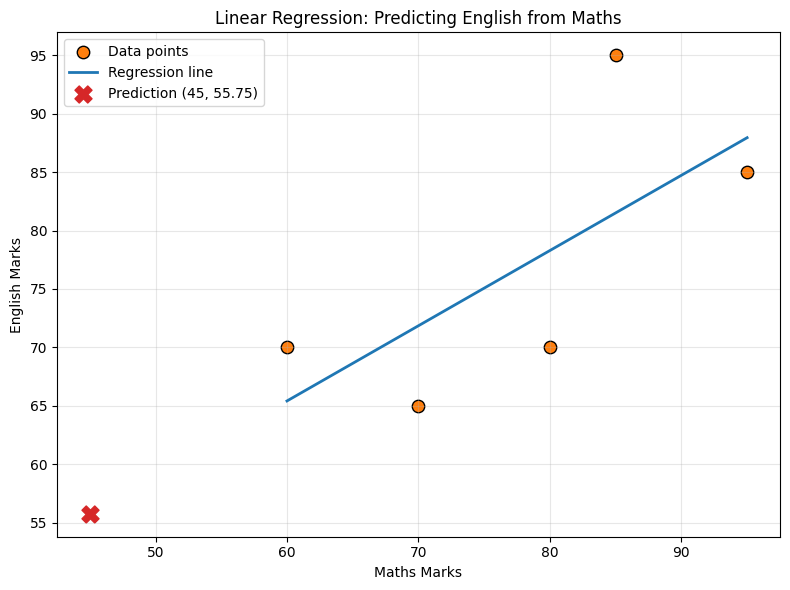

In [ ]:
#Code for Linear Regresiion with graph
import pandas as pd
import matplotlib.pyplot as plt

students = ['1', '2', '3', '4', '5']
maths    = [95, 85, 80, 70, 60]
english  = [85, 95, 70, 65, 70]

# Compute means
mean_x = sum(maths)   / len(maths)
mean_y = sum(english) / len(english)

# Deviations from the mean
x  = [xi - mean_x for xi in maths]
y  = [yi - mean_y for yi in english]
x2 = [xi*xi for xi in x]
y2 = [yi*yi for yi in y]
xy = [x[i] * y[i] for i in range(len(x))]

# Build a DataFrame for the step‑by‑step table
df = pd.DataFrame({
    'Student':        students,
    'Maths (X)':      maths,
    'English (Y)':    english,
    f'x = X - {mean_x:.2f}': x,
    f'y = Y - {mean_y:.2f}': y,
    'x²':             x2,
    'y²':             y2,
    'x·y':            xy
})

# Append totals row
totals = ['', '', '', '', '', sum(x2), sum(y2), sum(xy)]
df.loc['Total'] = totals

# Print the calculation table
print("=== Regression Calculation Table ===")
print(df.to_string(index=True))
print("\n")  # blank line

# Compute regression coefficients: Y = a + b*X
b = sum(xy) / sum(x2)
a = mean_y  - b * mean_x

# Predict Y for a new X
X_new = 45
Y_pred = a + b * X_new

# Output the regression equation and prediction
print("=== Regression Results ===")
print(f"Regression Equation: Y = {a:.4f} + {b:.4f} X")
print(f"Predicted English mark for Maths = {X_new}: {Y_pred:.4f}")

# Plot the data, regression line, and prediction
plt.figure(figsize=(8, 6))
plt.scatter(maths, english,
            color='tab:orange', edgecolor='k', s=80,
            label='Data points')
# Regression line
line_x = sorted(maths)
line_y = [a + b * xi for xi in line_x]
plt.plot(line_x, line_y,
         color='tab:blue', lw=2,
         label='Regression line')
# Prediction point
plt.scatter([X_new], [Y_pred],
            color='tab:red', marker='X', s=150,
            label=f'Prediction ({X_new}, {Y_pred:.2f})')

plt.xlabel('Maths Marks')
plt.ylabel('English Marks')
plt.title('Linear Regression: Predicting English from Maths')
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()
